# Model Blackbody radiation

In [56]:
import matplotlib.pyplot as plt
# from astropy.modeling.physical_models import BlackBody
from astropy.modeling.models import BlackBody
from astropy import constants as const
from astropy import units as u
from astropy.units import imperial
import numpy as np

imperial.enable();

## Black body

In [69]:
bb = BlackBody(temperature=5000*u.K)
wav = np.arange(500, 2500) * u.nm
flux = bb(wav)
flux = flux.to(u.W/(u.Hz * u.sr * u.m**2))
hz_to_nm = (1*u.Hz).to(u.nm, equivalencies=u.spectral())/(1*u.Hz)
spectral_radiance = flux / hz_to_nm

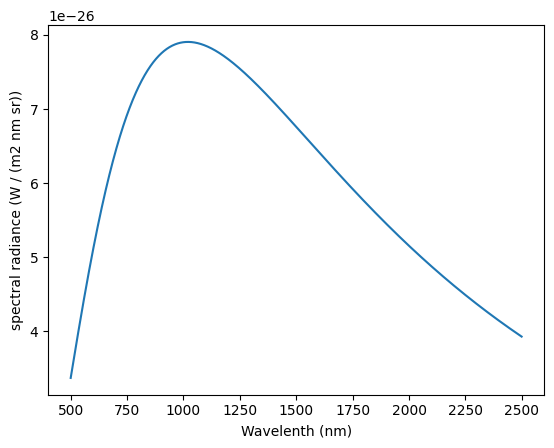

In [70]:
plt.plot(wav, spectral_radiance)
plt.xlabel('Wavelenth ({})'.format(wav._unit))
plt.ylabel('spectral radiance ({})'.format(spectral_radiance._unit))
plt.show()

## Scale

https://www.simtrum.com/upload/Plupload/File_662/20201208143906776.html

$\Sigma = \pi (NA)^2$

In [4]:
# Values to change

fibre_NA = 0.15 # Fibre numerical aperature
fibre_mode_diameter = 5*u.micron # diameter of the fibre

In [5]:
fibre_core_area = (fibre_NA**2 * np.pi)*u.sr
fibre_mode_radius = (fibre_mode_diameter/2)
mode_field_area = (np.pi*fibre_mode_radius**2).to(u.meter**2)

scaled_spectral_radiance = fibre_core_area * mode_field_area * spectral_radiance

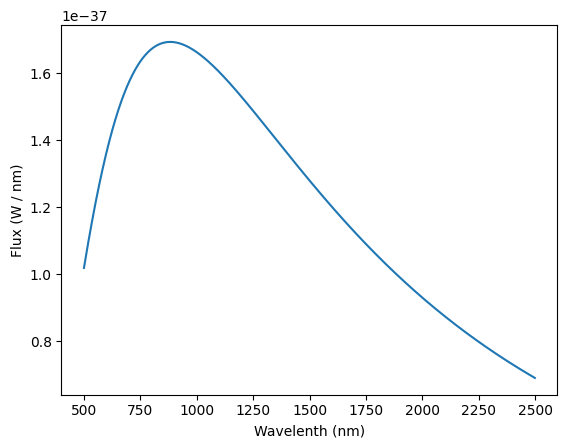

In [6]:
plt.plot(wav, scaled_spectral_radiance)
plt.xlabel('Wavelenth ({})'.format(wav._unit))
plt.ylabel('Flux ({})'.format(scaled_spectral_radiance._unit))
plt.show()

## Sanity check to compare with online calculator

https://spectralcalc.com/blackbody_calculator/blackbody.php

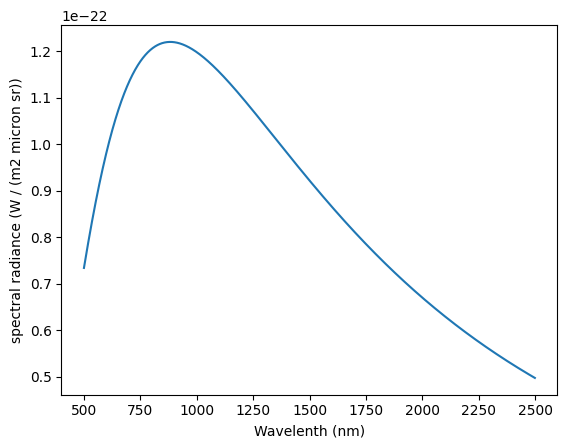

In [22]:
bb = BlackBody(temperature=5778*u.K)
wav = np.arange(500, 2500) * u.nm

flux = bb(wav)
flux = flux.to(u.W/(u.Hz * u.sr * u.m**2))
hz_to_micron = (1*u.Hz).to(u.nm, equivalencies=u.spectral())/(1*u.Hz)
spectral_radiance = flux / hz_to_micron

spectral_radiance = spectral_radiance.to(u.W/(u.micron * u.sr * u.m**2))

plt.plot(wav, spectral_radiance)
plt.xlabel('Wavelenth ({})'.format(wav._unit))
plt.ylabel('spectral radiance ({})'.format(spectral_radiance._unit))
plt.show()

## Manual

c =v x lambda
v = c/lambda

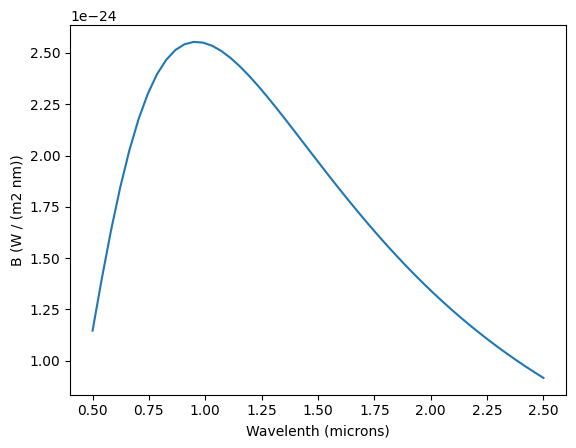

In [124]:
T = 5000 * u.K
llambda = (np.linspace(500, 2500) * u.nm).to(u.meter)
v = const.c/llambda
h = const.h
c = const.c
k = const.k_B

B = (2 * h * v**3)/c**2 * 1/(np.exp(h*v/(k*T) - 1))
B = B.to(u.W/u.Hz/u.meter**2)/hz_to_nm

plt.plot(llambda.to(u.micron), B)
plt.xlabel('Wavelenth (microns)')
plt.ylabel('B ({})'.format(B._unit))
plt.show()

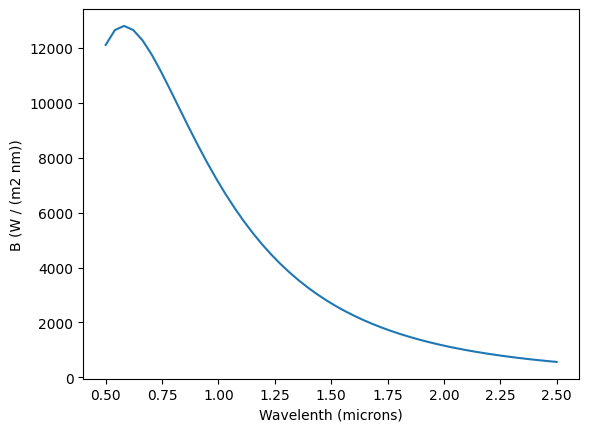

In [137]:
T = 5000 * u.K
llambda = (np.linspace(500, 2500) * u.nm).to(u.meter)
v = const.c/llambda
h = const.h
c = const.c
k = const.k_B

B = (2 * h * c**2)/llambda**5 * 1/(np.exp(h*c/(llambda*k*T)) - 1)
B = B.to(u.W / (u.meter**2 * u.nm))
plt.plot(llambda.to(u.micron), B)
plt.xlabel('Wavelenth (microns)')
plt.ylabel('B ({})'.format(B._unit))
plt.show()

In [118]:
# Conversion

hz_to_nm = (1*u.Hz).to(u.nm, equivalencies=u.spectral())/(1*u.Hz)

print(1*u.Hz * hz_to_nm)
print(2*u.Hz * hz_to_nm)

2.9979245799999994e+17 nm
5.995849159999999e+17 nm


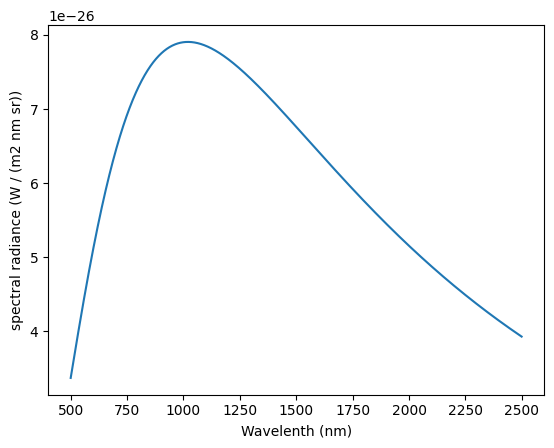

In [119]:
bb = BlackBody(temperature=5000*u.K)
wav = np.arange(500, 2500) * u.nm
flux = bb(wav)
flux = flux.to(u.W/(u.Hz * u.sr * u.m**2))
hz_to_nm = (1*u.Hz).to(u.nm, equivalencies=u.spectral())/(1*u.Hz)
spectral_radiance = flux / hz_to_nm

plt.plot(wav, spectral_radiance)
plt.xlabel('Wavelenth ({})'.format(wav._unit))
plt.ylabel('spectral radiance ({})'.format(spectral_radiance._unit))
plt.show()